In [1]:
%load_ext autoreload
%autoreload 2


import sys
import healpy as hp
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
#import mxxl_real
import glob
from astropy.table import vstack,Table,join
from fa_tools import fa_plot
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask, scnd_mask
import pylab as pl
import S4Mock_io
import mock_ledger
from desimodel.footprint import is_point_in_desi, tiles2pix
from desitarget.geomask import pixarea2nside

In [2]:
real_ledger = Table.read('/global/cscratch1/sd/mjwilson/S4MOCK/SV3REAL/SV3REALLEDGER/bright/sv3mtl-bright-hp-2286.ecsv')

In [3]:
real_ledger

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,SV3_SCND_TARGET,NUMOBS_MORE,NUMOBS,Z,ZWARN,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,PRIORITY
deg,deg,yr,mas,mas / yr,mas / yr,,,,,,,,,,,,,,,,s,,
float64,float64,float32,float32,float32,float32,int64,int64,int64,int64,float64,int32,int64,int64,int64,int64,int64,float64,int64,int32,str15,str19,str6,int64
217.73608243261785,31.624176941716936,2015.5,0.6340721,-3.4084375,-4.2615895,39628512469979585,2305843009213693952,0,10240,0.8728752434659032,516,101500,9,0,9,0,-1.0,-1,-1,MWS|UNOBS,2021-04-04T23:05:09,0.57.0,101500
217.76439598987412,31.608362549870048,0.0,0.0,0.0,0.0,39628512474169502,1152921504606846976,65545,0,0.5071972495832677,516,102100,9,0,9,0,-1.0,-1,-1,BGS|UNOBS,2021-04-04T23:05:09,0.57.0,102100
217.77159685491742,31.624485717360052,0.0,0.0,0.0,0.0,39628512474169617,1152921504606846976,131074,0,0.2921555185298247,516,102100,9,0,9,0,-1.0,-1,-1,BGS|UNOBS,2021-04-04T23:05:09,0.57.0,102100
217.78100706334567,31.599874496642013,0.0,0.0,0.0,0.0,39628512474169765,1152921504606846976,131074,0,0.4694947888187566,516,102100,9,0,9,0,-1.0,-1,-1,BGS|UNOBS,2021-04-04T23:05:09,0.57.0,102100
217.8055852697873,31.602226927040327,0.0,0.0,0.0,0.0,39628512474170159,1152921504606846976,131074,0,0.7826275278104561,516,102100,9,0,9,0,-1.0,-1,-1,BGS|UNOBS,2021-04-04T23:05:09,0.57.0,102100
217.81034215761122,31.55448874349163,2015.5,0.16359553,-4.7480626,-6.9652095,39628512474170233,2305843009213693952,0,1280,0.4274339386921536,516,101500,9,0,9,0,-1.0,-1,-1,MWS|UNOBS,2021-04-04T23:05:09,0.57.0,101500
217.82194708840706,31.615377277700713,2015.5,0.255832,-9.186272,-12.39891,39628512474170438,2305843009213693952,0,1280,0.3602902877765175,516,101500,9,0,9,0,-1.0,-1,-1,MWS|UNOBS,2021-04-04T23:05:09,0.57.0,101500
217.82234511365533,31.597234576462625,0.0,0.0,0.0,0.0,39628512474170447,1152921504606846976,65537,0,0.004233600803935311,516,102000,9,0,9,0,-1.0,-1,-1,BGS|UNOBS,2021-04-04T23:05:09,0.57.0,102000


In [ ]:
ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/sv3/bright/sv3mtl-bright-hp-*.ecsv')])

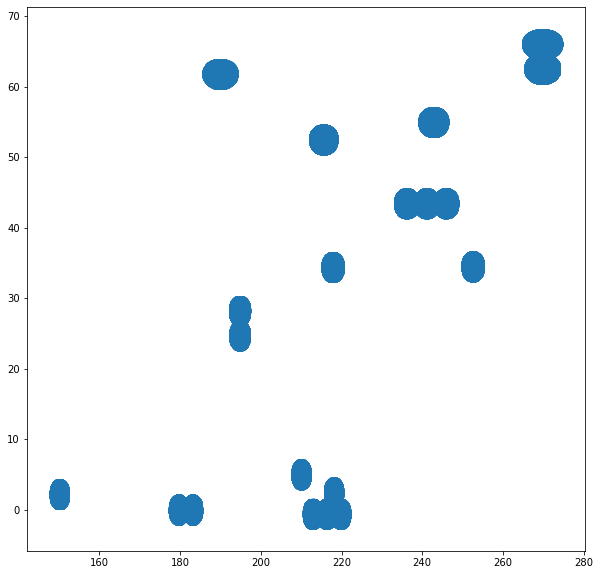

In [92]:
plt.figure(figsize=(10,10))


#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label='FTARGETS (fba-000012.fits)', alpha=0.5)
plt.scatter(ledger['RA'],ledger['DEC'],label='Ledger', alpha=0.5)

Requested fieldrot=223.9 arcsec delta=0.0 arcsec
Requested fieldrot=223.9 arcsec delta=0.0 arcsec


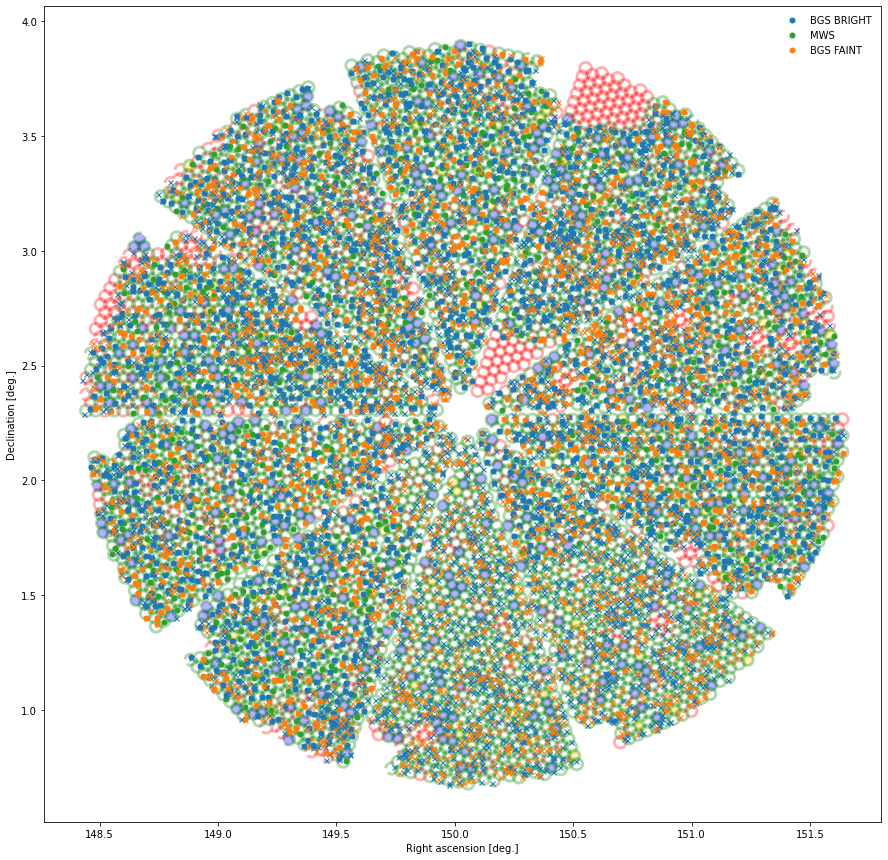

<Figure size 432x288 with 0 Axes>

In [89]:
fa_plot('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/fa/SV3/20210406/fba-000012.fits',ledger)

In [93]:
p = fits.open('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/fa/SV3/20210406/fba-000012.fits')
fassign = p['FASSIGN'].data
favail = p['FAVAIL'].data
ftargs = p['FTARGETS'].data

In [94]:
#target files produced by fiberassign
#targs = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/*-targ.fits')])

In [95]:
nights    = [x.split('/')[-1] for x in sorted(glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3' + '/*'))]
nights

['20210406',
 '20210407',
 '20210408',
 '20210409',
 '20210410',
 '20210411',
 '20210412',
 '20210413',
 '20210414',
 '20210415',
 '20210416',
 '20210417',
 '20210418',
 '20210420',
 '20210422',
 '20210429',
 '20210501',
 '20210502',
 '20210503',
 '20210504',
 '20210505',
 '20210506',
 '20210507',
 '20210508',
 '20210509',
 '20210510',
 '20210511',
 '20210512',
 '20210514',
 '20210529']

In [96]:
favails= vstack([Table(fits.open(x)['FAVAIL'].data) for night in nights for x in glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}/fba-*.fits')])

In [97]:
fbas = vstack([Table.read(x) for night in nights for x in glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}/fba-*.fits')])

In [98]:
targs= vstack([Table.read(x) for night in nights for x in glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}//*-targ.fits')])

In [11]:
#target files produced by fiberassign
#fbas = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-*.fits')])

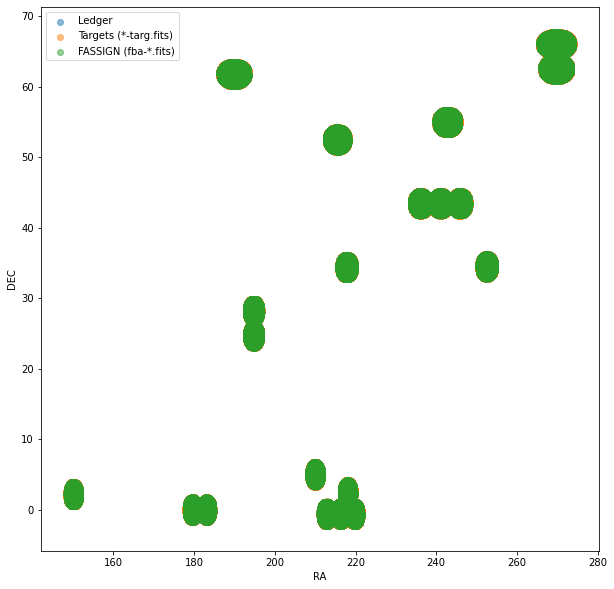

In [99]:
plt.figure(figsize=(10,10))


#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label='FTARGETS (fba-000012.fits)', alpha=0.5)
plt.scatter(ledger['RA'],ledger['DEC'],label='Ledger', alpha=0.5)
plt.scatter(targs['RA'],targs['DEC'],label='Targets (*-targ.fits)', alpha=0.5)
plt.scatter(fbas['TARGET_RA'],fbas['TARGET_DEC'],label='FASSIGN (fba-*.fits)', alpha=0.5)
#plt.scatter(favail['RA'],favail['DEC'])

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(170,190)
#plt.ylim(-5,5)
plt.legend()

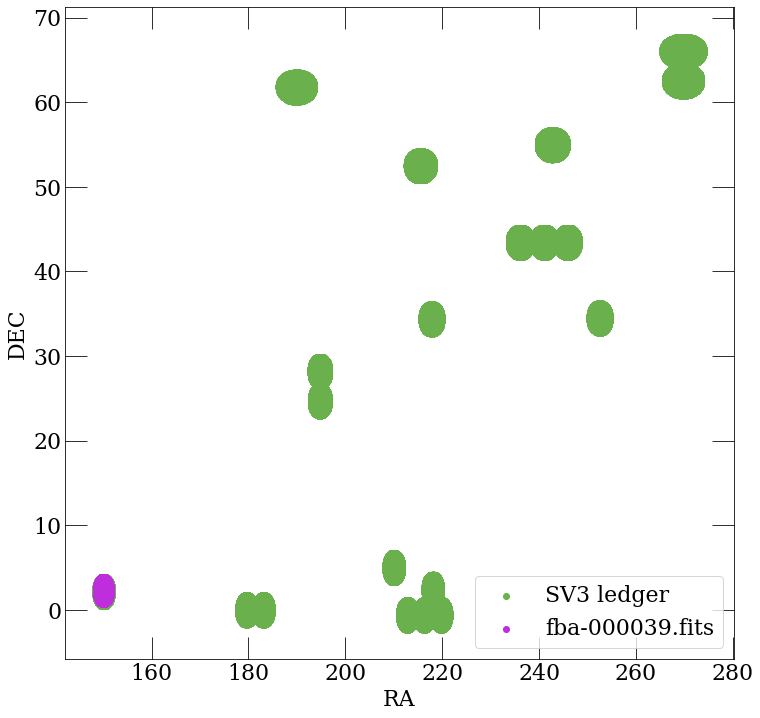

In [106]:
#same but for one fba file

plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)
plt.figure(figsize=(12,12))


#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label='FTARGETS (fba-000012.fits)', alpha=0.5)
plt.scatter(ledger['RA'],ledger['DEC'],label='SV3 ledger',color='#6ab04c')
#plt.scatter(targs['RA'],targs['DEC'],label='Targets (*-targ.fits)', alpha=0.01)
plt.scatter(fassign['TARGET_RA'],fassign['TARGET_DEC'],label='fba-000039.fits',color='#be2edd')

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(170,190)
#plt.ylim(-5,5)
plt.legend()
plt.savefig('sv3_area')

In [77]:
"""
fba       = join(fassign,  ledger, keys='TARGETID', join_type='left')
favl      = join(favail, ledger, keys='TARGETID', join_type='left')

#checking same hp for tiles and ledger
from S4Mock_io import read_sv3tiles
tiles = read_sv3tiles()
hps       = geometry.radec2pix(tiles, unique=True, nside=32)
print(hps.data)

from geometry import radec2pix
pix = radec2pix(ledger)
np.unique(pix).data
"""

In [15]:
#checking whether fassign etc is in ledger
np.mean(np.in1d(fassign['TARGETID'],ledger['TARGETID']))
np.mean(np.in1d(favail['TARGETID'],ledger['TARGETID']))

0.10241378447369738

In [16]:
#shows how to load a zbest file 
x = np.loadtxt('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210408/zbest-20210408.txt')
Table(x)

col0,col1,col2,col3,col4,col5,col6
float64,float64,float64,float64,float64,float64,float64
150.18338221946973,0.6174839698407382,1.0,10.0,-1.0,0.0,14.0
149.98307124547748,0.6953661218335309,3.962780536065762e+16,1.0,-1.0,0.0,14.0
150.01560262852746,0.7622320311726333,3.9627805364846936e+16,1.0,-1.0,0.0,14.0
150.05164773555427,0.7188449002156928,3.962780536484769e+16,1.0,-1.0,0.0,14.0
150.07090580155003,0.6814054794357722,3.962780536484813e+16,1.0,-1.0,0.0,14.0
150.08984271365568,0.7263454922349547,3.962780536484859e+16,1.0,-1.0,0.0,14.0
150.1116427368599,0.8564555432519285,3.962780536484913e+16,1.0,-1.0,0.0,14.0
150.13271053055186,0.7761409328922929,3.9627805364849656e+16,1.0,-1.0,0.0,14.0
150.1569858989039,0.8183697001288422,3.962780536485019e+16,1.0,-1.0,0.0,14.0


In [75]:
from desimodel.footprint import is_point_in_desi, tiles2pix
from desitarget.geomask import pixarea2nside
import geometry

#read targets in 
#get tiles
tiles = S4Mock_io.read_sv3tiles()
# closest nside to DESI tile area of ~7 deg
nside = pixarea2nside(7.)
# ADM determine the pixels that touch the tiles.
pixlist = tiles2pix(nside, tiles=tiles)
#read in mxxl
mxxl =S4Mock_io.read_mxxl(small=False,nside=nside)
#read in our mxxl targets but having this nside and this pixlist 
targets = mxxl[np.in1d(mxxl['HPX'],pixlist)]
#restrict only to targets in the requested tiles...
ii = is_point_in_desi(tiles, targets["RA"], targets["DEC"])
targets = targets[ii]
#now get pixlist in nside=32
pix32 = geometry.radec2pix(targets,nside=32)
targets['HPX']=pix32

TypeError: radec2pix() missing 1 required positional argument: 'dec'

In [ ]:
#compare whole mxxl and a particular fba file 
plt.figure(figsize=(10,10))
plt.scatter(targets['RA'],targets['DEC'],label='mxxl')
#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label= 'FTARGET: fba-000039.fits')
plt.legend()

In [83]:
#sv3 pix now more accurate as not just using central ra and dec 
pix4ledger = geometry.radec2pix(targets,nside=32,unique=True).data
pix4ledger

array([2286, 2287, 2333, 2334, 2335, 2356, 2357, 2376, 2378, 2400, 2447,
       2453, 2454, 2455, 2457, 2458, 2459, 2460, 2461, 2462, 2469, 2471,
       2480, 2481, 2482, 2483, 2484, 2495, 2496, 2498, 2504, 2536, 2537,
       2538, 2539, 2549, 2551, 2557, 2559, 2592, 2594, 2595, 2600, 2601,
       2602, 2628, 2629, 2630, 2631, 2679, 2685, 2803, 2806, 2807, 2809,
       2812, 2813, 2837, 2850, 2851, 2856, 2857, 2880, 2881, 2901, 2903,
       2978, 2984, 3834, 3835, 3838, 3839, 4010, 4011, 6398, 6399, 6477,
       6478, 6479, 6481, 6482, 6483, 6484, 6486, 6488, 6489, 6490, 6491,
       6492, 6493, 6494, 6495, 6500, 6501, 6503, 6509, 6511, 6512, 6513,
       6516, 6517, 6520, 6521, 6522, 6523, 6562, 6563, 6568, 6569, 6570,
       6571, 6572, 6574, 6608, 6609, 6740, 6741, 6743, 6809, 6811, 6812,
       6814, 6815, 6833, 6836, 6837, 6912, 6914, 7006, 7007, 7028, 7029,
       7030, 7031, 7037])

In [84]:
#creating ledger so lets not do this again
"""
for i in range(len(pix4ledger)):
    mock_ledger.create_mock_ledger_hp(outdir='/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2', healpix=pix4ledger[i], mxxl=targets, overwrite=False)
"""

Selected 0.327 as BGS Bright
Check: 0.039
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2286.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2286.ecsv
Selected 0.314 as BGS Bright
Check: 0.040
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2287.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2287.ecsv
Selected 0.293 as BGS Bright
Check: 0.031
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2333.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2333.ecsv
Selected 0.331 as BGS Bright
Check: 0.036
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2334.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2334.ecsv
Selected 0.341 as BGS Bright
Check: 0.037
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv

In [112]:
import os.path



tiles = S4Mock_io.read_sv3tiles()
rosettes = np.unique(tiles['ROSETTE']).data
for i in range(len(rosettes)):
    tiles_for_rosette = np.unique(tiles[(tiles['ROSETTE']==rosettes[i])]['TILEID']).data
    print('Rosette {} tiles:{}'.format(rosettes[i],tiles_for_rosette))
    for j in range(len(tiles_for_rosette)):
        test = []
        for k in range(len(nights)):
            if os.path.exists('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/fa/SV3/' +nights[k] +'/fba-{:06}.fits'.format(tiles_for_rosette[j])) == True:
                test.append(1)
                print('Rosette {} complete: tile {}, night {}'.format(rosettes[i],tiles_for_rosette[j],nights[k]))
            else:
                continue
        if len(test)==1:
            continue
        else:
            print('Rosette {} incomplete: no tile {}'.format(rosettes[i],tiles_for_rosette[j]))

    

Rosette 0 tiles:[12 13 14 15 16 17 18 19 20 21]
Rosette 0 complete: tile 12, night 20210406
Rosette 0 complete: tile 13, night 20210407
Rosette 0 complete: tile 14, night 20210408
Rosette 0 complete: tile 15, night 20210409
Rosette 0 complete: tile 16, night 20210413
Rosette 0 complete: tile 17, night 20210418
Rosette 0 complete: tile 18, night 20210429
Rosette 0 complete: tile 19, night 20210501
Rosette 0 complete: tile 20, night 20210502
Rosette 0 complete: tile 21, night 20210503
Rosette 1 tiles:[39 40 41 42 43 44 45 46 47 48 49]
Rosette 1 complete: tile 39, night 20210406
Rosette 1 complete: tile 40, night 20210407
Rosette 1 complete: tile 41, night 20210408
Rosette 1 complete: tile 42, night 20210411
Rosette 1 complete: tile 43, night 20210413
Rosette 1 complete: tile 44, night 20210416
Rosette 1 complete: tile 45, night 20210417
Rosette 1 complete: tile 46, night 20210418
Rosette 1 complete: tile 47, night 20210501
Rosette 1 complete: tile 48, night 20210502
Rosette 1 complete: t

In [22]:
whole_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/sv3mtl-bright-hp-*.ecsv')])

In [76]:
init_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/sv3/bright/initial/sv3mtl-bright-hp-*.ecsv')])

In [83]:
is_mws= ((init_ledger['SV3_DESI_TARGET'].data & desi_mask['MWS_ANY']) != 0)
is_bgs= ((init_ledger['SV3_DESI_TARGET'].data & desi_mask['BGS_ANY']) != 0)
mws = init_ledger[is_mws]
bgs = init_ledger[is_bgs]


In [78]:
real_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/S4MOCK/SV3REAL/SV3REALLEDGER/bright/sv3mtl-bright-hp-*.ecsv')])

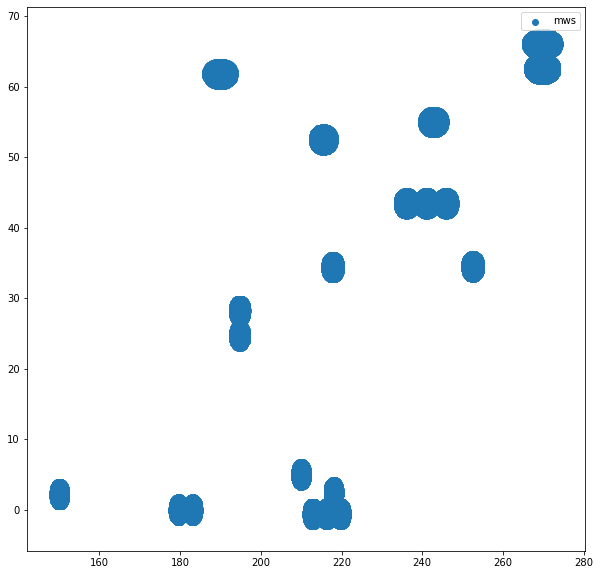

In [84]:
#compare whole mxxl and a particular fba file 
plt.figure(figsize=(10,10))

plt.scatter(mws['RA'].data,mws['DEC'].data,label='mws')
#plt.scatter(bgs['RA'].data,bgs['DEC'].data,label='bgs')


plt.legend()

In [80]:
is_mws= ((real_ledger['SV3_DESI_TARGET'].data & desi_mask['MWS_ANY']) != 0)
is_bgs= ((real_ledger['SV3_DESI_TARGET'].data & desi_mask['BGS_ANY']) != 0)
mws = real_ledger[is_mws]
bgs = real_ledger[is_bgs]


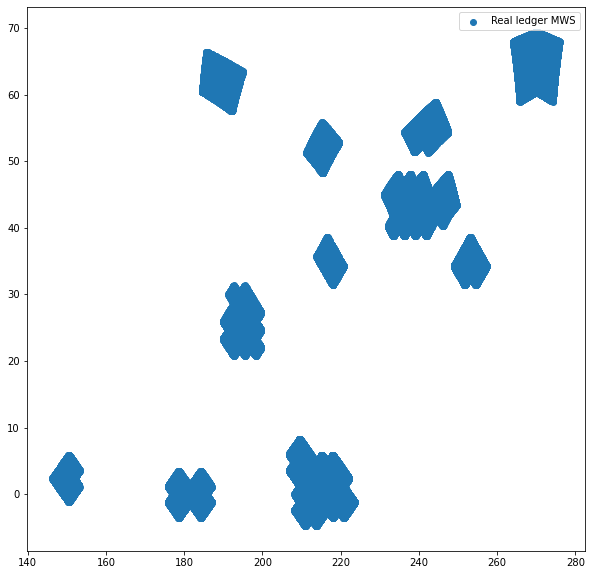

In [81]:
#compare whole mxxl and a particular fba file 
plt.figure(figsize=(10,10))

plt.scatter(mws['RA'].data,mws['DEC'].data,label='Real ledger MWS')
#plt.scatter(bgs['RA'].data,bgs['DEC'].data,label='Real ledger BGS')


plt.legend()